In [34]:
import pickle 
with open('data.pkl','rb') as file:
    train_data=pickle.load(file)
train_data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,order_month_year
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,2018-01-31 22:56:00,77202,1360,13.110000,0.04,180517,327.750000,0.29,1,327.750000,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class,CallyHolloway,2018,1,2,22,2018-01
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,2018-01-13 12:27:00,75939,1360,16.389999,0.05,179254,327.750000,-0.80,1,327.750000,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class,IreneLuna,2018,1,5,12,2018-01
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,2018-01-13 12:06:00,75938,1360,18.030001,0.06,179253,327.750000,-0.80,1,327.750000,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class,GillianMaldonado,2018,1,5,12,2018-01
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,2018-01-13 11:45:00,75937,1360,22.940001,0.07,179252,327.750000,0.08,1,327.750000,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class,TanaTate,2018,1,5,11,2018-01
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,2018-01-13 11:24:00,75936,1360,29.500000,0.09,179251,327.750000,0.45,1,327.750000,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class,OrliHendricks,2018,1,5,11,2018-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,XXXXXXXXX,Maria,1005,Peterson,XXXXXXXXX,Home Office,NY,1322 Broad Glade,11207.0,7,Fan Shop,40.640930,-73.942711,Pa

In [35]:
import numpy as np
train_data['fraud']=np.where(train_data['Order Status']=='SUSPECTED_FRAUD',1,0)
train_data['fraud'].value_counts()

0    176457
1      4062
Name: fraud, dtype: int64

In [36]:
train_data['Delivery Status'].value_counts()

Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: Delivery Status, dtype: int64

In [37]:
train_data['late_delivery']=np.where(train_data['Delivery Status']=='Late delivery',1,0)
train_data['late_delivery'].value_counts()

1    98977
0    81542
Name: late_delivery, dtype: int64

In [38]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 61 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  object        
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Sales per customer             180519 non-null  float64       
 5   Delivery Status                180519 non-null  object        
 6   Late_delivery_risk             180519 non-null  int64         
 7   Category Id                    180519 non-null  int64         
 8   Category Name                  180519 non-null  object        
 9   Customer City                  180519 non-null  object        
 10  Customer Country               180519 non-null  object        
 11  

In [39]:
categorical_cols=train_data.select_dtypes(include='object').columns
categorical_cols

Index(['Type', 'Delivery Status', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Region', 'Order State',
       'Order Status', 'Product Image', 'Product Name',
       'shipping date (DateOrders)', 'Shipping Mode', 'Customer Full Name'],
      dtype='object')

In [40]:
for column in train_data.columns:
    if len(train_data[column].value_counts())<3:
        print(column)

Late_delivery_risk
Customer Country
Customer Email
Customer Password
Product Description
Product Status
fraud
late_delivery


In [41]:
train_data['Customer Country'].value_counts()

EE. UU.        111146
Puerto Rico     69373
Name: Customer Country, dtype: int64

In [42]:
train_data['Product Description'].value_counts()

Series([], Name: Product Description, dtype: int64)

In [43]:
train_data['Product Status'].value_counts()# product available

0    180519
Name: Product Status, dtype: int64

In [44]:
train_data['Late_delivery_risk'].value_counts()

1    98977
0    81542
Name: Late_delivery_risk, dtype: int64

In [45]:
train_data.drop(['Customer Email','Customer Password','Product Description','Product Status','Product Image','Customer Lname','Customer Fname'],axis=1,inplace=True)
len(train_data.columns)

54

In [46]:
train_data.drop(['Order Customer Id','Order Item Cardprod Id','Order Item Id','Sales per customer','Order Item Total','Order Profit Per Order',\
                 'Product Card Id','Product Category Id','Product Price'],axis=1,inplace=True)
len(train_data.columns)

45

In [47]:
import pandas as pd
pd.set_option('display.max_columns',None)
train_data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,order date (DateOrders),Order Id,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order State,Order Status,Order Zipcode,Product Name,shipping date (DateOrders),Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,order_month_year,fraud,late_delivery
0,DEBIT,3,4,91.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,2018-01-31 22:56:00,77202,13.110000,0.04,327.750000,0.29,1,327.750000,Southeast Asia,Java Occidental,COMPLETE,NaN,Smart watch,2/3/2018 22:56,Standard Class,CallyHolloway,2018,1,2,22,2018-01,0,0
1,TRANSFER,5,4,-249.089996,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,2018-01-13 12:27:00,75939,16.389999,0.05,327.750000,-0.80,1,327.750000,South Asia,Rajastán,PENDING,NaN,Smart watch,1/18/2018 12:27,Standard Class,IreneLuna,2018,1,5,12,2018-01,0,1
2,CASH,4,4,-247.779999,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,2018-01-13 12:06:00,75938,18.030001,0.06,327.750000,-0.80,1,327.750000,South Asia,Rajastán,CLOSED,NaN,Smart watch,1/17/2018 12:06,Standard Class,GillianMaldonado,2018,1,5,12,2018-01,0,0
3,DEBIT,3,4,22.860001,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,2018-01-13 11:45:00,75937,22.940001,0.07,327.750000,0.08,1,327.750000,Oceania,Queensland,COMPLETE,NaN,Smart watch,1/16/2018 11:45,Standard Class,TanaTate,2018,1,5,11,2018-01,0,0
4,PAYMENT,2,4,134.210007,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,2018-01-13 11:24:00,75936,29.500000,0.09,327.750000,0.45,1,327.750000,Oceania,Queensland,PENDING_PAYMENT,NaN,Smart watch,1/15/2018 11:24,Standard Class,OrliHendricks,2018,1,5,11,2018-01,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,1005,Home Office,NY,1322 Broad Glade,11207.0,7,Fan Shop,40.640930,-73.942711,Pacific Asia,Shanghái,China,2016-01-16 03:40:00,26043,0.000000,0.00,399.980011,0.10,1,399.980011,Eastern Asia,Shanghái,CLOSED,NaN,Field & Stream Sportsman 16 Gun Fire Safe,1/20/2016 3:40,Standard Class,MariaPeterson,2016,1,5,3,2016-01,0,0
180515,DEBIT,3,2,-613.770019,Late delivery,1,45,Fishing,Bakersfield,EE. UU.,9141,Corporate,CA,7330 Broad Apple Moor,93304.0,7,Fan Shop,35.362545,-119.018700,Pacific Asia,Hirakata,Japón,2016-01-16 01:34:00,26037,4.000000,0.01,399.980011,-1.55,1,399.980011,Eastern Asia,Osaka,COMPLETE,NaN,Field & Stream Sportsman 16 Gun Fire Safe,1/19/2016 1:34,Second Class,RonaldClark,2016,1,5,1,2016-01,0,1
180516,TRANSFER,5,4,141.110001,Late delivery,1,45,Fishing,Bristol,EE. UU.,291,Corporate,CT,97 Burning Landing,6010.0,7,Fan Shop,41.629959,-72.967155,Pacific Asia,Adelaide,Australia,2016-01-15 21:00:00,26024,8.000000,0.02,399.980011,0.36,1,399.980011,Oceania,Australia del Sur,PENDING,NaN,Field & Stream Sportsman 16 Gun Fire Safe,1/20/2016 21:00,Standard Class,JohnSmith,2016,1,4,21,2016-01,0,1
180517,PAYMENT,3,4,186.229996,Advance shipping,0,45,Fishing,Caguas,Puerto Rico,2813

In [48]:
train_data['Order Zipcode'].value_counts()

10035.0    648
10009.0    550
10024.0    541
94122.0    526
10011.0    463
          ... 
59801.0      1
60477.0      1
31088.0      1
61832.0      1
30188.0      1
Name: Order Zipcode, Length: 609, dtype: int64

In [49]:
train_data.drop(['Order Zipcode','shipping date (DateOrders)','Latitude','Longitude','Customer Street','order date (DateOrders)','order_month_year','Order Status','Delivery Status','Late_delivery_risk','Order Item Product Price'],axis=1,inplace=True)
len(train_data.columns)

34

In [50]:
categorical_cols=train_data.select_dtypes(include='object').columns
categorical_cols

Index(['Type', 'Category Name', 'Customer City', 'Customer Country',
       'Customer Segment', 'Customer State', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Region', 'Order State',
       'Product Name', 'Shipping Mode', 'Customer Full Name'],
      dtype='object')

In [51]:
train_data=train_data.dropna(subset=['Customer Full Name'])

In [52]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for cat in categorical_cols:
    train_data[cat]=le.fit_transform(train_data[cat])
train_data


<ipython-input-52-a060cddc7251>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[cat]=le.fit_transform(train_data[cat])


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Id,Department Name,Market,Order City,Order Country,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order State,Product Name,Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,fraud,late_delivery
0,1,3,4,91.250000,73,40,66,1,20755,0,36,725.0,2,4,3,331,70,77202,13.110000,0.04,0.29,1,327.750000,15,475,78,3,1875,2018,1,2,22,0,0
1,3,5,4,-249.089996,73,40,66,1,19492,0,36,725.0,2,4,3,391,69,75939,16.389999,0.05,-0.80,1,327.750000,13,841,78,3,5374,2018,1,5,12,0,1
2,0,4,4,-247.779999,73,40,452,0,19491,0,5,95125.0,2,4,3,391,69,75938,18.030001,0.06,-0.80,1,327.750000,13,841,78,3,4426,2018,1,5,12,0,0
3,1,3,4,22.860001,73,40,285,0,19490,2,5,90027.0,2,4,3,3226,8,75937,22.940001,0.07,0.08,1,327.750000,11,835,78,3,12922,2018,1,5,11,0,0
4,2,2,4,134.210007,73,40,66,1,19489,1,36,725.0,2,4,3,3226,8,75936,29.500000,0.09,0.45,1,327.750000,11,835,78,3,10632,2018,1,5,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,4,4,40.000000,45,18,59,0,1005,2,31,11207.0,7,3,3,2922,31,26043,0.000000,0.00,0.10,1,399.980011,7,913,24,3,8421,2016,1,5,3,0,0
180515,1,3,2,-613.770019,45,18,26,0,9141,1,5,93304.0,7,3,3,1362,77,26037,4.000000,0.01,-1.55,1,399.980011,7,770,24,2,11672,2016,1,5,1,0,1
180516,3,5,4,141.110001,45,18,55,0,291,1,7,6010.0,7,3,3,25,8,26024,8.000000,0.02,0.36,1,399.980011,11,88,24,3,6296,2016,1,4,21,0,1
180517,2,3,4,186.229996,45,18,66,1,2813,0,36,725.0,7,3,3,25,8,26022,12.000000,0.03,0.48,1,399.980011,11,88,24,3,9379,2016,1,4,20,0,0


In [53]:
numberical_columns=train_data.columns.tolist()
for x in categorical_cols.tolist():
    numberical_columns.remove(x)
numberical_columns

['Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Category Id',
 'Customer Id',
 'Customer Zipcode',
 'Department Id',
 'Order Id',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'order_year',
 'order_month',
 'order_week_day',
 'order_hour',
 'fraud',
 'late_delivery']

In [54]:
x_fraud=train_data.loc[:,train_data.columns!='fraud']
y_fraud=train_data['fraud']
x_fraud
x_late=train_data.loc[:,train_data.columns!='late_delivery']
y_late=train_data['late_delivery']

x_sales=train_data.loc[:,train_data.columns!='Sales']
y_sales=train_data['Sales']

x_quantity=train_data.loc[:,train_data.columns!='Order Item Quantity']
y_quantity=train_data['Order Item Quantity']

In [55]:
from sklearn.model_selection import train_test_split
x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test=train_test_split(x_fraud,y_fraud,test_size=0.2)
x_late_train,x_late_test,y_late_train,y_late_test=train_test_split(x_late,y_late,test_size=0.2)

x_sales_train,x_sales_test,y_sales_train,y_sales_test=train_test_split(x_sales,y_sales,test_size=0.2)
x_quantity_train,x_quantity_test,y_quantity_train,y_quantity_test=train_test_split(x_quantity,y_quantity,test_size=0.2)

In [56]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_fraud_train=sc.fit_transform(x_fraud_train)
x_fraud_test=sc.transform(x_fraud_test)

x_late_train=sc.fit_transform(x_late_train)
x_late_test=sc.transform(x_late_test)

x_sales_train=sc.fit_transform(x_sales_train)
x_sales_test=sc.transform(x_sales_test)

x_quantity_train=sc.fit_transform(x_quantity_train)
x_quantity_test=sc.transform(x_quantity_test)

In [57]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,f1_score,confusion_matrix,mean_squared_error,mean_absolute_error
def model_stats(model,x_train,x_test,y_train,y_test,name='Fraud'):
    model=model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy=accuracy_score(y_pred,y_test)
    recall=recall_score(y_pred,y_test)
    auc=roc_auc_score(y_pred,y_test)
    confusion=confusion_matrix(y_pred,y_test)
    f1=f1_score(y_pred,y_test)
    print('model used',model)
    print('{} accurancy:{}%'.format(name,accuracy*100))
    print('{} recall:{}%'.format(name,recall*100))
    print('{} auc:{}%'.format(name,auc*100))
    print('{} f1:{}%'.format(name,f1*100))
    print('{} confusion matrix:\n'.format(name,confusion))
    return accuracy,recall,f1
    
#线性回归评价
def model_linearregreassion_stats(model,x_train,x_test,y_train,y_test,name='Fraud'):
    model=model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    mse=mean_squared_error(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    print('model used',model)
    print('{} mse:{}'.format(name,mse))
    print('{} mae:{}'.format(name,mae))
    return model

In [58]:
from sklearn.linear_model import LogisticRegression
model_fraud=LogisticRegression()
model_late=LogisticRegression()
model_stats(model_fraud,x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test,name='Fraud')
model_stats(model_late,x_late_train,x_late_test,y_late_train,y_late_test,name='late delivery')

E:\jupyter\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


model used LogisticRegression()
Fraud accurancy:97.86721325097638%
Fraud recall:54.54545454545454%
Fraud auc:76.42633667395839%
Fraud f1:33.9622641509434%
Fraud confusion matrix:

model used LogisticRegression()
late delivery accurancy:98.87820956707199%
late delivery recall:97.99614071545199%
late delivery auc:98.998070357726%
late delivery f1:98.98793012969489%
late delivery confusion matrix:



(0.9887820956707198, 0.9799614071545198, 0.9898793012969489)

In [59]:
from sklearn.linear_model import LinearRegression
model_sales=LinearRegression()
model_quantity=LinearRegression()
model_linearregreassion_stats(model_sales,x_sales_train,x_sales_test,y_sales_train,y_sales_test,name='Sales')
model_linearregreassion_stats(model_quantity,x_quantity_train,x_quantity_test,y_quantity_train,y_quantity_test,name='Order Item Quantity')


model used LinearRegression()
Sales mse:4709.031820445474
Sales mae:43.92881168521861
model used LinearRegression()
Order Item Quantity mse:1.4803191340396986
Order Item Quantity mae:0.984593375528687


LinearRegression()

In [60]:
'''
直接进行计算，结果如下
model used LinearRegression()
Sales mse:947.0693874482523
Sales mae:18.24414168721006
model used LinearRegression()
Order Item Quantity mse:0.28046639997268835
Order Item Quantity mae:0.34738786063362087
    
Order Item Quantity预测模型的mse和mae都非常小，接近于0，怀疑标签泄露，重新查看数据发现  Order Item Product Price*Order Item Quantity=Sales，因此在前面数据处理的部分增加drop一列 Order Item Product Price
'''
train_data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State',
       'Customer Zipcode', 'Department Id', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Region', 'Order State',
       'Product Name', 'Shipping Mode', 'Customer Full Name', 'order_year',
       'order_month', 'order_week_day', 'order_hour', 'fraud',
       'late_delivery'],
      dtype='object')

In [61]:
model_sales.coef_
# Benefit per order 、Category Id、Order Id、Order Item Discount、Order Item Quantity与sales具有较高的相关性，主要是产品的利润、产品数量、产品种类等，决定了销售额

array([ 2.20100425e-01,  1.68238512e-01,  7.60724584e-01,  1.56558115e+01,
        1.51144479e+01, -1.62591289e+01, -1.74728002e-01,  4.45252198e-03,
       -3.62640023e-01, -2.68520363e-01,  5.62742050e-01,  4.41675823e-01,
       -2.72003296e+00,  2.41264447e+00, -1.68471341e+00,  4.09455582e-02,
        2.74733002e-01,  5.57776754e+01,  1.21070655e+02, -7.96413364e+01,
       -1.31192697e+01,  1.61039869e+01,  5.08399488e-01, -3.82520253e-01,
       -2.11187244e+01, -6.98385047e-01, -8.13343102e-02, -5.33581716e+01,
       -1.73098720e+01,  5.44781441e-01, -2.84417543e-01, -2.78911725e-01,
       -2.75584746e-01])

In [62]:
model_quantity.coef_
#从相关系数来看商品购买数量与大部分的特征都没有特别高的正相关性，但是与Category Id有较高的负相关性，说明有些种类的商品订购数量会相对较少。

array([ 7.88624677e-04,  7.40360566e-03, -2.82710026e-02,  1.99286436e-02,
       -4.61873618e-01, -3.84147877e-02, -2.11601948e-03, -6.92452296e-03,
       -1.07109669e-02, -2.57784333e-03,  4.81816486e-03, -4.97039122e-03,
        6.00669039e-02,  3.35198465e-01,  2.66425295e-02,  4.57287282e-04,
        8.54039329e-03, -1.85869852e-01, -1.60885551e-02,  8.76913026e-03,
       -1.47216113e-02,  4.59166736e-01, -1.43868745e-02,  2.10801351e-03,
        5.54589174e-01,  2.02308036e-02,  4.08948300e-03,  1.38261606e-01,
        3.03174668e-02, -1.71117629e-05, -3.65618957e-04, -1.34932068e-03,
       -5.64513705e-03])

In [63]:
'''
from sklearn import svm
model_sales_SVR = svm.SVR()
model_linearregreassion_stats(model_sales_SVR,x_sales_train,x_sales_test,y_sales_train,y_sales_test,name='Sales_SVR')
'''

"\nfrom sklearn import svm\nmodel_sales_SVR = svm.SVR()\nmodel_linearregreassion_stats(model_sales_SVR,x_sales_train,x_sales_test,y_sales_train,y_sales_test,name='Sales_SVR')\n"

In [64]:
#svm的效果不如简单的线性回归，可能需要进一步的特征筛选和构造
x_sales_train

array([[ 1.33296831,  1.54208114,  0.77766803, ...,  0.07603385,
        -0.15175998,  0.90713617],
       [-0.67712215,  0.30947123, -0.67818363, ..., -0.64628023,
        -0.15175998,  0.90713617],
       [ 0.32792308, -0.92313868, -1.40610946, ..., -0.06842896,
        -0.15175998,  0.90713617],
       ...,
       [-0.67712215,  1.54208114,  0.77766803, ..., -0.50181741,
        -0.15175998,  0.90713617],
       [-1.68216739, -0.92313868,  0.77766803, ...,  1.23173637,
        -0.15175998, -1.10237034],
       [ 0.32792308, -0.92313868,  0.77766803, ..., -0.3573546 ,
        -0.15175998, -1.10237034]])

In [65]:
important_col=model_sales.coef_.argsort()
#feature_importance=pd.DataFrame({'features':1,'importance':2})
feature_importance=pd.DataFrame({'features':x_sales.columns[important_col],'importance':model_sales.coef_[important_col]})
feature_importance

,features,importance
0,Order Item Discount Rate,-79.641336
1,order_year,-53.358172
2,Product Name,-21.118724
3,order_month,-17.309872
4,Category Name,-16.259129
5,Order Item Profit Ratio,-13.119270
6,Department Id,-2.720033
7,Market,-1.684713
8,Shipping Mode,-0.698385
9,Order State,-0.382520


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

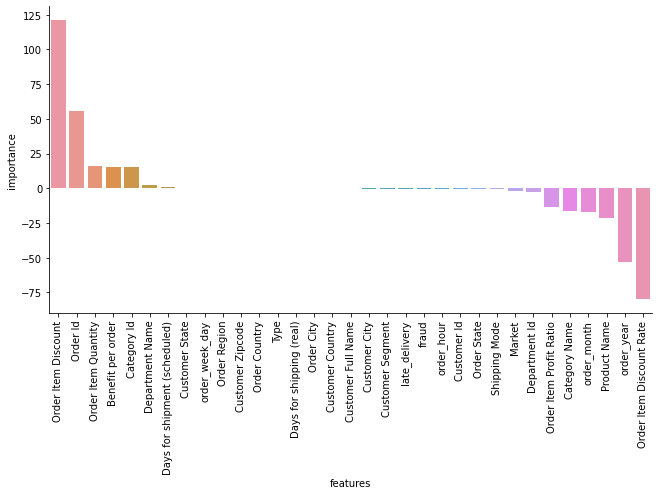

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
feature_importance=feature_importance.sort_values(by='importance',ascending=False)
sns.catplot(x='features',y='importance',data=feature_importance,kind='bar',height=5,aspect=2)
plt.xticks(rotation=90)
#商品的折扣很大程度上与商品的销售额有关

In [69]:
important_col1=model_quantity.coef_.argsort()
#feature_importance=pd.DataFrame({'features':1,'importance':2})
feature_importance1=pd.DataFrame({'features':x_quantity.columns[important_col1],'importance':model_quantity.coef_[important_col1]})
feature_importance

,features,importance
0,Category Id,-0.461874
1,Order Id,-0.185870
2,Category Name,-0.038415
3,Days for shipment (scheduled),-0.028271
4,Order Item Discount,-0.016089
5,Order Item Profit Ratio,-0.014722
6,Order Region,-0.014387
7,Customer Id,-0.010711
8,Customer Country,-0.006925
9,late_delivery,-0.005645


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

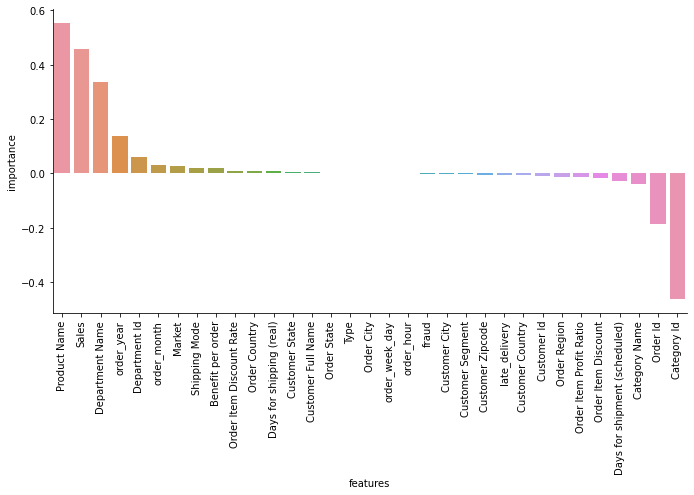

In [83]:
feature_importance1=feature_importance1.sort_values(by='importance',ascending=False)
sns.catplot(x='features',y='importance',data=feature_importance1,kind='bar',height=5,aspect=2)
plt.xticks(rotation=90)
#可以看到商品的种类和商品的订购时间与商品的订购数量有很大的关系

In [70]:
from imblearn.over_sampling import SMOTE
smo=SMOTE(random_state=28,sampling_strategy='minority')
X_smo, y_smo = smo.fit_sample(x_fraud_train, y_fraud_train)
model_fraud_smote=LogisticRegression()
model_stats(model_fraud_smote,X_smo,x_fraud_test,y_smo,y_fraud_test,name='Fraud_smote')

model used LogisticRegression()
Fraud_smote accurancy:88.1699581752209%
Fraud_smote recall:15.785319652722968%
Fraud_smote auc:57.887826573582366%
Fraud_smote f1:27.252597513200485%
Fraud_smote confusion matrix:



E:\jupyter\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.881699581752209, 0.15785319652722968, 0.2725259751320048)

In [80]:
print(y_smo.value_counts())
x_fraud_train.shape

1    141149
0    141149
Name: fraud, dtype: int64


(144408, 33)

In [81]:
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
keras.layers.BatchNormalization()
classifier=Sequential()
classifier.add(Dense(512,activation='relu',kernel_initializer='random_normal',input_dim=33))
classifier.add(Dense(256,activation='relu',kernel_initializer='random_normal'))
classifier.add(Dense(128,activation='relu',kernel_initializer='random_normal'))
classifier.add(Dense(64,activation='relu',kernel_initializer='random_normal'))
classifier.add(Dense(1,activation='sigmoid',kernel_initializer='random_normal'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
classifier.fit(x_fraud_train,y_fraud_train,batch_size=512,epochs=10)

Epoch 1/10
283/283 [==============================] - 3s 9ms/step - loss: 0.0864 - accuracy: 0.9747
Epoch 2/10
283/283 [==============================] - 2s 8ms/step - loss: 0.0526 - accuracy: 0.9784
Epoch 3/10
283/283 [==============================] - 2s 8ms/step - loss: 0.0497 - accuracy: 0.9800
Epoch 4/10
283/283 [==============================] - 2s 9ms/step - loss: 0.0477 - accuracy: 0.9807
Epoch 5/10
283/283 [==============================] - 2s 8ms/step - loss: 0.0459 - accuracy: 0.9815
Epoch 6/10
283/283 [==============================] - 2s 8ms/step - loss: 0.0436 - accuracy: 0.9824
Epoch 7/10
283/283 [==============================] - 3s 9ms/step - loss: 0.0403 - accuracy: 0.9838
Epoch 8/10
283/283 [==============================] - 3s 9ms/step - loss: 0.0360 - accuracy: 0.9852
Epoch 9/10
283/283 [==============================] - 2s 8ms/step - loss: 0.0311 - accuracy: 0.9875
Epoch 10/10
283/283 [==============================] - 2s 8ms/step - loss: 0.0270 - accuracy: 0.9895

In [82]:
test_evaluate=classifier.evaluate(x_fraud_test,y_fraud_test)

1129/1129 [==============================] - 1s 1ms/step - loss: 0.0444 - accuracy: 0.9840


In [86]:
from sklearn.ensemble import RandomForestClassifier
model_fraud_rf=RandomForestClassifier()
model_late_rf=RandomForestClassifier()
model_stats(model_fraud_rf,x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test,name='Fraud randomforest')
model_stats(model_late_rf,x_late_train,x_late_test,y_late_train,y_late_test,name='late delivery randomforest')

model used RandomForestClassifier()
Fraud randomforest accurancy:98.98069412514195%
Fraud randomforest recall:97.8021978021978%
Fraud randomforest auc:98.39896694418688%
Fraud randomforest f1:70.74721780604133%
Fraud randomforest confusion matrix:

model used RandomForestClassifier()
late delivery randomforest accurancy:99.23552059385646%
late delivery randomforest recall:98.62563489692262%
late delivery randomforest auc:99.31281744846132%
late delivery randomforest f1:99.30806257521058%
late delivery randomforest confusion matrix:



(0.9923552059385646, 0.9862563489692262, 0.9930806257521059)

In [88]:
'''
import xgboost as xgb
model_fraud_xgb=xgb.XGBClassifier()
model_late_xgb=xgb.XGBClassifier()
model_stats(model_fraud_xgb,x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test,name='Fraud xgb')
model_stats(model_late_xgb,x_late_train,x_late_test,y_late_train,y_late_test,name='late delivery xgb')
'''

"\nimport xgboost as xgb\nmodel_fraud_xgb=xgb.XGBClassifier()\nmodel_late_xgb=xgb.XGBClassifier()\nmodel_stats(model_fraud_xgb,x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test,name='Fraud xgb')\nmodel_stats(model_late_xgb,x_late_train,x_late_test,y_late_train,y_late_test,name='late delivery xgb')\n"

In [89]:
from sklearn.linear_model import Lasso
model_sales_lso=Lasso()
model_quantity_lso=Lasso()
model_linearregreassion_stats(model_sales_lso,x_sales_train,x_sales_test,y_sales_train,y_sales_test,name='Sales Lasso')
model_linearregreassion_stats(model_quantity_lso,x_quantity_train,x_quantity_test,y_quantity_train,y_quantity_test,name='Order Item Quantity Lasso')

model used Lasso()
Sales Lasso mse:4761.529316155025
Sales Lasso mae:43.80287852320965
model used Lasso()
Order Item Quantity Lasso mse:2.1315304680793847
Order Item Quantity Lasso mae:1.2716530516910178


Lasso()

In [90]:
from sklearn.linear_model import Ridge
model_sales_rdg=Ridge()
model_quantity_rdg=Ridge()
model_linearregreassion_stats(model_sales_rdg,x_sales_train,x_sales_test,y_sales_train,y_sales_test,name='Sales ridge')
model_linearregreassion_stats(model_quantity_rdg,x_quantity_train,x_quantity_test,y_quantity_train,y_quantity_test,name='Order Item Quantity ridge')

model used Ridge()
Sales ridge mse:4709.0486986864
Sales ridge mae:43.92817040685131
model used Ridge()
Order Item Quantity ridge mse:1.4803207435703234
Order Item Quantity ridge mae:0.9845950109248924


Ridge()

In [93]:
import lightgbm as lgb
model_sales_lgb=lgb.LGBMRegressor()
model_quantity_lgb=lgb.LGBMRegressor()
model_linearregreassion_stats(model_sales_lgb,x_sales_train,x_sales_test,y_sales_train,y_sales_test,name='Sales lgb')
model_linearregreassion_stats(model_quantity_lgb,x_quantity_train,x_quantity_test,y_quantity_train,y_quantity_test,name='Order Item Quantity lgb')

model used LGBMRegressor()
Sales lgb mse:74.46725571776675
Sales lgb mae:3.673508612448922
model used LGBMRegressor()
Order Item Quantity lgb mse:0.0009306168926250793
Order Item Quantity lgb mae:0.010232084047378565


LGBMRegressor()

In [95]:
from sklearn.ensemble import RandomForestRegressor 
model_sales_rdf=RandomForestRegressor()
model_quantity_rdf=RandomForestRegressor()
model_linearregreassion_stats(model_sales_rdf,x_sales_train,x_sales_test,y_sales_train,y_sales_test,name='Sales rdf')
model_linearregreassion_stats(model_quantity_rdf,x_quantity_train,x_quantity_test,y_quantity_train,y_quantity_test,name='Order Item Quantity rdf')

model used RandomForestRegressor()
Sales rdf mse:37.94917562829634
Sales rdf mae:0.2197360110023926
model used RandomForestRegressor()
Order Item Quantity rdf mse:1.6098385175747167e-05
Order Item Quantity rdf mae:0.0001373847048721712


RandomForestRegressor()